**Importing Libraries**

In [0]:
from google.colab import files
import numpy as np
from google.colab import files
import pandas as pd
import io
from sklearn.metrics import f1_score

In [0]:
train_url='https://raw.githubusercontent.com/abhishek0508/Machine-Learning/master/Assignment_1/OneDrive_1_21-01-2020/q1/train.csv'
test_url='https://raw.githubusercontent.com/abhishek0508/Machine-Learning/master/Assignment_1/OneDrive_1_21-01-2020/q1/test.csv'
test_label_url='https://raw.githubusercontent.com/abhishek0508/Machine-Learning/master/Assignment_1/OneDrive_1_21-01-2020/q1/test_labels.csv'

In [0]:
df = pd.read_csv(train_url)

In [0]:
test = pd.read_csv(test_url)

##Splitting into validation and training dataset (80% Train, 20% validation)

In [0]:
msk = np.random.rand(len(df)) < 0.8
validation = df[~msk]
train = df[msk]
x = train.loc[:, df.columns!='1']
## there

## Featurizing vectors as images

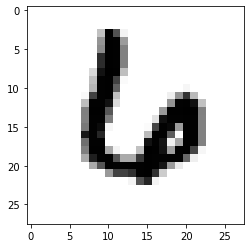

In [9]:
some_digit = x.loc[4].to_numpy()
some_digit_image = some_digit.reshape(28,28)
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary, interpolation='nearest')

**Omitting labels from validation dataset**

In [0]:
validation_without_label = validation[validation.columns[1:]]
# validation_without_label

In [0]:
validation_with_label = validation[validation.columns[:1]]

In [0]:
train_without_label = train[train.columns[1:]]

In [0]:
train_with_label = train[train.columns[:1]]
train_label = train_with_label.to_numpy()
train_label
from collections import Counter
from sklearn.metrics import accuracy_score

## KNN for Different Values of k

In [0]:
def fun(dist,k):
  knn = []
  for i in range(0,k):
    knn.append(dist[i])
  
  # print(knn)
  knn_label = []
  for i in range(0,len(knn)):
    knn_label.append(knn[i][1])
  
  knn_value = Counter(knn_label)
  res = knn_value.most_common(1)[0][0]

  # print(res)
  return res

def compare(y_predict,y_true):
    print(accuracy_score(y_true,y_predict))

dist = []
model_label = []

for index_validation , row_validation in validation_without_label.iterrows():
  i=0
  for index_train, row_train in train_without_label.iterrows():
    row_diff = np.power((row_validation.values-row_train.values),2)
    row_euclid_diff = int(np.sqrt(np.sum(row_diff)))
    x = int(train_label[i])
    dist.append((row_euclid_diff,x))
    i=i+1
  # print(dist)
  dist2 = sorted(dist, key=lambda x: x[0])
  model_label.append(fun(dist2,4))
  dist.clear()
# print(model_label)
validation_label = []
for i in range(0,len(validation_with_label.values)):
  validation_label.append(int(validation_with_label.values[i]))
# print(validation_label)
print("Accuracy Score")
# print('k==',k)



In [17]:
compare(model_label,validation_label)
model_label.clear();
validation_label.clear()

0.9589276930644368


In [0]:
from sklearn.metrics import f1_score

## Applying KNN using SKLearn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv(train_url)
knn = KNeighborsClassifier()

train_label = df[df.columns[0]].to_numpy()
train_data = df[df.columns[1:]].to_numpy()

knn.fit(train_data,train_label)

test=pd.read_csv(test_url)
test = test.to_numpy()
knn.predict(test)

test_label = pd.read_csv(test_label_url)

print(knn.score(test,test_label))

0.960960960960961
